In [ ]:
import pandas as pd
import numpy as np
import folium
from matplotlib import pyplot as plt
from io import BytesIO
import base64

intersection_data = pd.read_csv('D:/Dr. Shamshiripour/PAG_TMC/TmcIntersection.CSV')
intersection_data = intersection_data[['IntersectionId', 'Latitude', 'Longitude']]
count_data = pd.read_csv('D:/Dr. Shamshiripour/PAG_TMC/TmcCount.CSV')
count_data = count_data[['CountId', 'IntersectionId', 'StartDate']]
count_data['IntersectionId'] = count_data['IntersectionId'].astype(int)
count_data['StartDate'] = (count_data['StartDate'] / 1e9).astype(int).astype(str)
count_data['StartDate'] = pd.to_datetime(count_data['StartDate'], format='%Y%m%d', errors = 'coerce')
count_data['Year'] = count_data['StartDate'].dt.year
count_data['DayOfWeek'] = count_data['StartDate'].dt.day_name()
count_data.dropna(subset = ['IntersectionId'], inplace = True)
most_recent_years = count_data.groupby('IntersectionId')['Year'].max()
count_data = count_data[count_data['Year'] == count_data['IntersectionId'].map(most_recent_years)] 
valid_combinations = count_data.groupby(['IntersectionId', 'Year'])['StartDate'].nunique() > 3
valid_combinations = valid_combinations[valid_combinations].index
count_data = count_data[count_data.set_index(['IntersectionId', 'Year']).index.isin(valid_combinations)]
count_data = count_data[~count_data['DayOfWeek'].isin(['Saturday', 'Sunday'])]

chunks = []
for chunk in pd.read_csv('D:/Dr. Shamshiripour/PAG_TMC/TmcCountData.CSV', chunksize = 50000,
                         usecols = ['CountId', 'ClassificationId', 'StartTime',
                                    'HardLeftMovement', 'LeftMovement', 'BearLeftMovement', 
                                    'ThruOrPedMovement', 'BearRightMovement', 'RightMovement', 
                                    'HardRightMovement', 'UTurnMovement']):
    chunk['StartTime'] = pd.to_datetime(chunk['StartTime'], format = '%H:%M:%S').dt.time
    chunk = chunk.merge(count_data, on = 'CountId', how = 'inner')
    chunk = chunk.merge(intersection_data, on = 'IntersectionId', how = 'inner')
    chunk['TotalCount'] = chunk[['HardLeftMovement', 'LeftMovement', 'BearLeftMovement', 
                                 'ThruOrPedMovement', 'BearRightMovement', 'RightMovement', 
                                 'HardRightMovement', 'UTurnMovement']].sum(axis = 1)
    chunk = chunk[chunk['ClassificationId'] == 1]
    chunks.append(chunk)
    del chunk
cars = pd.concat(chunks, ignore_index = True)
car_summary = cars.groupby(['IntersectionId', 'ClassificationId', 'Latitude', 
                            'Longitude', 'StartDate', 'Year'])['TotalCount'].sum().reset_index()
car_summary = car_summary.groupby(['IntersectionId', 'ClassificationId', 'Latitude', 
                                   'Longitude', 'Year']).agg(AverageWeekdayVolume = ('TotalCount', 'mean')).reset_index()
car_summary

,IntersectionId,ClassificationId,Latitude,Longitude,Year,AverageWeekdayVolume
0,60428,1,32.134247,-110.909517,2021,39582.201117


In [3]:
chunks = []
for chunk in pd.read_csv('D:/Dr. Shamshiripour/PAG_TMC/TmcCountData.CSV', chunksize = 50000,
                         usecols = ['CountId', 'ClassificationId', 'StartTime',
                                    'HardLeftMovement', 'LeftMovement', 'BearLeftMovement', 
                                    'ThruOrPedMovement', 'BearRightMovement', 'RightMovement', 
                                    'HardRightMovement', 'UTurnMovement']):
    chunk['StartTime'] = pd.to_datetime(chunk['StartTime'], format = '%H:%M:%S').dt.time
    chunk = chunk.merge(count_data, on = 'CountId', how = 'inner')
    chunk = chunk.merge(intersection_data, on = 'IntersectionId', how = 'inner')
    chunk['TotalCount'] = chunk[['HardLeftMovement', 'LeftMovement', 'BearLeftMovement', 
                                 'ThruOrPedMovement', 'BearRightMovement', 'RightMovement', 
                                 'HardRightMovement', 'UTurnMovement']].sum(axis = 1)
    chunk = chunk[chunk['ClassificationId'] == 2]
    chunks.append(chunk)
    del chunk
trucks = pd.concat(chunks, ignore_index = True)
truck_summary = trucks.groupby(['IntersectionId', 'ClassificationId', 'Latitude', 
                                'Longitude', 'StartDate', 'Year'])['TotalCount'].sum().reset_index()
truck_summary = truck_summary.groupby(['IntersectionId', 'ClassificationId', 'Latitude', 
                                       'Longitude', 'Year']).agg(AverageWeekdayVolume = ('TotalCount', 'mean')).reset_index()
truck_summary

,IntersectionId,ClassificationId,Latitude,Longitude,Year,AverageWeekdayVolume


In [4]:
chunks = []
for chunk in pd.read_csv('D:/Dr. Shamshiripour/PAG_TMC/TmcCountData.CSV', chunksize = 50000,
                         usecols = ['CountId', 'ClassificationId', 'StartTime',
                                    'HardLeftMovement', 'LeftMovement', 'BearLeftMovement', 
                                    'ThruOrPedMovement', 'BearRightMovement', 'RightMovement', 
                                    'HardRightMovement', 'UTurnMovement']):
    chunk['StartTime'] = pd.to_datetime(chunk['StartTime'], format = '%H:%M:%S').dt.time
    chunk = chunk.merge(count_data, on = 'CountId', how = 'inner')
    chunk = chunk.merge(intersection_data, on = 'IntersectionId', how = 'inner')
    chunk['TotalCount'] = chunk[['HardLeftMovement', 'LeftMovement', 'BearLeftMovement', 
                                 'ThruOrPedMovement', 'BearRightMovement', 'RightMovement', 
                                 'HardRightMovement', 'UTurnMovement']].sum(axis = 1)
    chunk = chunk[chunk['ClassificationId'] == 3]
    chunks.append(chunk)
    del chunk
bikes = pd.concat(chunks, ignore_index = True)
bike_summary = bikes.groupby(['IntersectionId', 'ClassificationId', 'Latitude', 
                              'Longitude', 'StartDate', 'Year'])['TotalCount'].sum().reset_index()
bike_summary = bike_summary.groupby(['IntersectionId', 'ClassificationId', 'Latitude', 
                                     'Longitude', 'Year']).agg(AverageWeekdayVolume = ('TotalCount', 'mean')).reset_index()
def calculate_radius(count, max_count):
    return (count / max_count) * 30
max_count = bike_summary['AverageWeekdayVolume'].max()
m3 = folium.Map(location = [32.2226, -110.9747], zoom_start = 10, tiles = 'cartodbpositron')
for index, row in bike_summary.iterrows():
    if row['AverageWeekdayVolume'] > 0:
        folium.CircleMarker(
            location = (row['Latitude'], row['Longitude']),
            radius = calculate_radius(row['AverageWeekdayVolume'], max_count),
            color = '#ff8b8b',
            fill = True,
            fill_opacity = 0.5,
            popup = f"<b>Intersection ID:</b> {row['IntersectionId'].astype(int)}<br>" + 
                    f"<b>Year:</b> {row['Year'].astype(int)}<br>" + 
                    f"<b>Average Weekday Bike Count:</b> {row['AverageWeekdayVolume'].round(2)}"
        ).add_to(m3)
legend_html = '''
<div style = 'position: fixed; bottom: 50px; left: 50px; width: 250px; height: auto; border: 2px solid grey; 
              z-index: 9999; font-size: 14px; background-color: white; padding: 10px;'>
<b>Average Weekday Bike Count</b><br>
'''
for count in [20, 40, 60, 80]:
    radius = calculate_radius(count, max_count) * 1.5
    legend_html += f'''
    <div style = 'margin: 5px 0;'>
        {count}
        <div style = 'display: inline-block; width: {radius:.2f}px; height: {radius:.2f}px; 
                      background-color: #ff8b8b; border-radius: 100%; margin-left: 10px;'></div>
    </div>
    '''
legend_html += '</div>'
m3.get_root().html.add_child(folium.Element(legend_html))
m3.save('bike_miovision.html')
print('Map has been created and saved to bike_miovision.html')

Map has been created and saved to bike_miovision.html


In [5]:
chunks = []
for chunk in pd.read_csv('D:/Dr. Shamshiripour/PAG_TMC/TmcCountData.CSV', chunksize = 50000,
                         usecols = ['CountId', 'ClassificationId', 'StartTime',
                                    'HardLeftMovement', 'LeftMovement', 'BearLeftMovement', 
                                    'ThruOrPedMovement', 'BearRightMovement', 'RightMovement', 
                                    'HardRightMovement', 'UTurnMovement']):
    chunk['StartTime'] = pd.to_datetime(chunk['StartTime'], format = '%H:%M:%S').dt.time
    chunk = chunk.merge(count_data, on = 'CountId', how = 'inner')
    chunk = chunk.merge(intersection_data, on = 'IntersectionId', how = 'inner')
    chunk['TotalCount'] = chunk[['HardLeftMovement', 'LeftMovement', 'BearLeftMovement', 
                                 'ThruOrPedMovement', 'BearRightMovement', 'RightMovement', 
                                 'HardRightMovement', 'UTurnMovement']].sum(axis = 1)
    chunk = chunk[chunk['ClassificationId'] == 4]
    chunks.append(chunk)
    del chunk
pedestrians = pd.concat(chunks, ignore_index = True)
pedestrian_summary = pedestrians.groupby(['IntersectionId', 'ClassificationId', 'Latitude', 
                                          'Longitude', 'StartDate', 'Year'])['TotalCount'].sum().reset_index()
pedestrian_summary = pedestrian_summary.groupby(['IntersectionId', 'ClassificationId', 'Latitude', 
                                     'Longitude', 'Year']).agg(AverageWeekdayVolume = ('TotalCount', 'mean')).reset_index()
pedestrian_summary

,IntersectionId,ClassificationId,Latitude,Longitude,Year,AverageWeekdayVolume


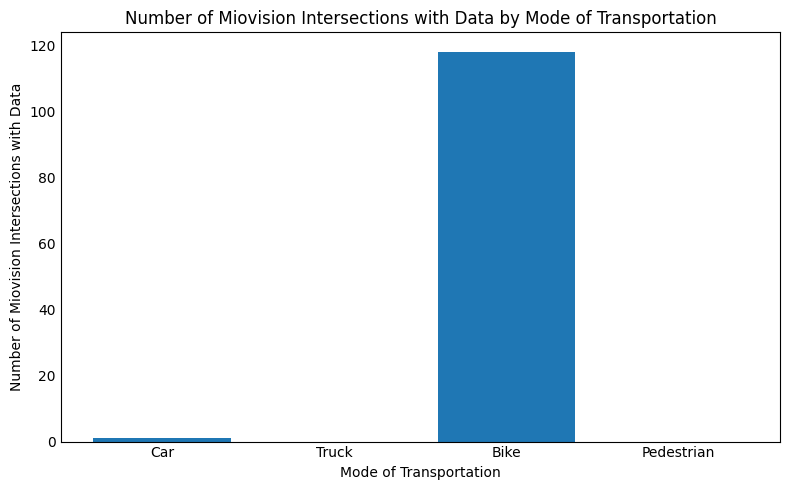

In [9]:
row_counts = [len(car_summary), len(truck_summary), len(bike_summary), len(pedestrian_summary)]
labels = ['Car', 'Truck', 'Bike', 'Pedestrian']
plt.figure(figsize = (8, 5))
plt.bar(labels, row_counts)
plt.xlabel('Mode of Transportation')
plt.ylabel('Number of Miovision Intersections with Data')
plt.title('Number of Miovision Intersections with Data by Mode of Transportation')
plt.tick_params(axis = 'x', length = 0)
plt.tick_params(axis = 'y', length = 0)
plt.tight_layout()
plt.show()